In [1]:
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np   
import seaborn as sns

In [2]:
# Reading datasets

dataframe1 = pd.read_csv(r'C:\Users\mohis\OneDrive\Documents\SJSU\Fall 2021\DATA 245\Project\dataset\UNSW-NB15_1.csv',low_memory=False, header=None)
dataframe2 = pd.read_csv(r'C:\Users\mohis\OneDrive\Documents\SJSU\Fall 2021\DATA 245\Project\dataset\UNSW-NB15_2.csv', low_memory=False, header=None)
dataframe3 = pd.read_csv(r'C:\Users\mohis\OneDrive\Documents\SJSU\Fall 2021\DATA 245\Project\dataset\UNSW-NB15_3.csv', low_memory=False, header=None)
dataframe4 = pd.read_csv(r'C:\Users\mohis\OneDrive\Documents\SJSU\Fall 2021\DATA 245\Project\dataset\UNSW-NB15_4.csv',low_memory=False, header=None)

In [3]:
df = pd.concat([dataframe1, dataframe2, dataframe3, dataframe4])
df.shape

(2540047, 49)

In [4]:
# Reading features.csv file and converting it to dataframe
df_feature = pd.read_csv(r'C:\Users\mohis\OneDrive\Documents\SJSU\Fall 2021\DATA 245\Project\dataset\NUSW-NB15_features.csv' , encoding = "ISO-8859-1")
df_feature['Name']

0                srcip
1                sport
2                dstip
3               dsport
4                proto
5                state
6                  dur
7               sbytes
8               dbytes
9                 sttl
10                dttl
11               sloss
12               dloss
13             service
14               Sload
15               Dload
16               Spkts
17               Dpkts
18                swin
19                dwin
20               stcpb
21               dtcpb
22             smeansz
23             dmeansz
24         trans_depth
25         res_bdy_len
26                Sjit
27                Djit
28               Stime
29               Ltime
30             Sintpkt
31             Dintpkt
32              tcprtt
33              synack
34              ackdat
35     is_sm_ips_ports
36        ct_state_ttl
37    ct_flw_http_mthd
38        is_ftp_login
39          ct_ftp_cmd
40          ct_srv_src
41          ct_srv_dst
42          ct_dst_ltm
43         

In [5]:
# Making column names lower case, removing spaces
df_feature['Name'] = df_feature['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [6]:
# Renaming our dataframe with proper column names (srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,stcpb,dtcpb,smeansz,dmeansz,res_bdy_len,sjit,djit,sintpkt,dintpkt,tcprtt,synack,ackdat,ct_state_ttl,ct_flw_http_mthd,ct_srv_src,ct_srv_dst,ct_dst_src_ltm,attack_cat,label)
df.columns = df_feature['Name']

In [7]:
# Delete data frames 1,2,3, and 4

del dataframe1
del dataframe2
del dataframe3
del dataframe4

Data Exploration Part:

In [93]:
# Take a sample of the data frame for exploration purpose


# generating one row 
sample = df.sample(frac =.5)
  
# checking if sample is 0.5 times data or not
  
if (0.05*(len(df))== len(sample)):
    print( "Cool")
    print(len(df), len(sample))
  
# display
sample

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
380093,59.166.0.1,19611,149.171.126.8,80,tcp,FIN,1.217890,1684,10168,31,...,0,3,3,2,8,1,1,1,NaN,0
393650,175.45.176.0,55936,149.171.126.19,80,tcp,FIN,0.518248,1526,268,254,...,,7,7,1,1,1,1,7,Fuzzers,1
43772,149.171.126.18,47439,175.45.176.3,53,udp,INT,0.000002,264,0,60,...,,37,37,25,25,25,25,37,NaN,0
591878,59.166.0.6,38920,149.171.126.3,6956,tcp,FIN,0.036684,3806,55400,31,...,,5,1,2,6,1,1,1,NaN,0
343602,59.166.0.2,43603,149.171.126.1,1213,tcp,FIN,0.012877,2438,19414,31,...,,9,5,7,14,1,1,5,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247881,59.166.0.8,46579,149.171.126.4,80,tcp,FIN,1.024443,1684,10168,31,...,0,1,1,7,1,1,1,1,NaN,0
334338,175.45.176.1,47439,149.171.126.18,53,udp,INT,0.000004,114,0,254,...,,9,9,7,7,7,7,9,Generic,1
587313,59.166.0.9,54242,149.171.126.1,30798,tcp,FIN,0.028660,2750,27886,31,...,,3,4,3,4,1,1,1,NaN,0
626317,59.166.0.2,25102,149.171.126.9,22847,tcp,FIN,0.056049,4238,65938,31,...,,3,6,2,3,1,1,4,NaN,0


In [94]:
sample.corr()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
Name,,,,,,,,,,,,,,,,,,,,,
dur,1.000000,0.033247,0.086909,-0.003880,0.010735,0.041728,0.087610,-0.014652,-0.022428,0.088309,...,0.011935,0.006318,-0.019141,-0.018367,-0.013765,-0.015794,-0.012995,-0.011238,-0.016083,0.001714
sbytes,0.033247,1.000000,0.047905,-0.008809,0.068037,0.951874,0.052144,-0.021350,-0.006903,0.596919,...,-0.012164,-0.012920,-0.035786,-0.035798,-0.028805,-0.028234,-0.028459,-0.028567,-0.031657,0.010520
dbytes,0.086909,0.047905,1.000000,-0.094113,0.008381,0.116703,0.991464,-0.069761,0.083785,0.731150,...,0.076489,-0.047417,-0.051271,-0.051828,-0.060222,-0.064899,-0.065992,-0.071839,-0.079735,-0.075868
sttl,-0.003880,-0.008809,-0.094113,1.000000,0.113642,-0.070050,-0.118436,0.281190,-0.246985,-0.151546,...,0.034765,-0.009174,0.455865,0.458325,0.394647,0.395934,0.457340,0.479083,0.513894,0.904747
dttl,0.010735,0.068037,0.008381,0.113642,1.000000,0.078528,0.013159,-0.218602,-0.022627,0.046569,...,0.153723,0.068940,-0.301048,-0.308597,-0.287529,-0.278054,-0.274424,-0.287479,-0.289757,0.136345
sloss,0.041728,0.951874,0.116703,-0.070050,0.078528,1.000000,0.154609,-0.069851,0.047424,0.721385,...,-0.066930,0.067730,-0.082728,-0.084189,-0.080782,-0.080401,-0.086836,-0.088911,-0.095641,-0.043564
dloss,0.087610,0.052144,0.991464,-0.118436,0.013159,0.154609,1.000000,-0.088471,0.108679,0.770045,...,0.061449,-0.019215,-0.072669,-0.074050,-0.081733,-0.085908,-0.090204,-0.096180,-0.105876,-0.096051
sload,-0.014652,-0.021350,-0.069761,0.281190,-0.218602,-0.069851,-0.088471,1.000000,-0.174310,-0.125548,...,-0.027334,-0.018540,0.471650,0.477112,0.427499,0.417673,0.472165,0.488104,0.511527,0.193146
dload,-0.022428,-0.006903,0.083785,-0.246985,-0.022627,0.047424,0.108679,-0.174310,1.000000,0.168103,...,-0.160544,-0.120369,-0.148074,-0.172446,-0.216079,-0.193849,-0.234189,-0.235921,-0.254510,-0.220034


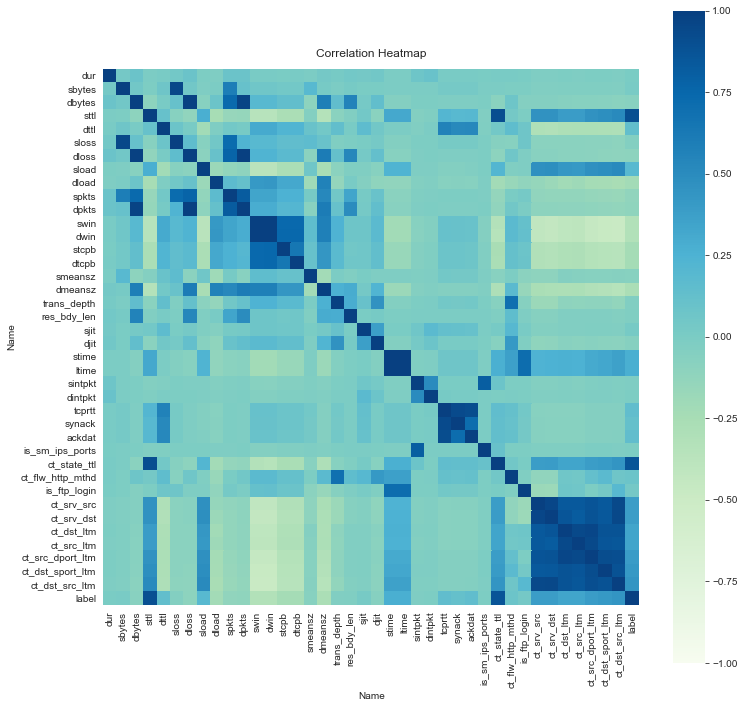

In [95]:
plt.figure(figsize=(12, 12))
method = "pearson"
correlation = sample.corr(method=method)
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=False,square=True, cmap="GnBu")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', pad=12);

In [96]:
# Getting and printing high correlated features
limit = 0.9

columns = correlation.columns
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {correlation.iloc[i, j]}")

sbytes               sloss                0.951874138186714
dbytes               dloss                0.9914642146407707
dbytes               dpkts                0.971256818286008
sttl                 ct_state_ttl         0.9066960392943626
sttl                 label                0.9047465815936683
dloss                dpkts                0.9922567944167154
swin                 dwin                 0.9972605171218966
stime                ltime                0.9999999997548117
tcprtt               synack               0.9318968347586956
tcprtt               ackdat               0.9210252923591506
ct_srv_src           ct_srv_dst           0.9567292187050532
ct_srv_src           ct_dst_src_ltm       0.9421354967719977
ct_srv_dst           ct_dst_src_ltm       0.951053072194209
ct_dst_ltm           ct_src_ltm           0.9385847431762256
ct_dst_ltm           ct_src_dport_ltm     0.9603553559604658
ct_src_ltm           ct_src_dport_ltm     0.9452819727549654
ct_src_dport_ltm     ct_dst

## Pairplot between highly correlated features ##

#### sbytes and sloss ####
1. These features are having very high corr between them more 95%
2. All the features are following a straight line except for the starting points that means they are having incresing relation with each other.

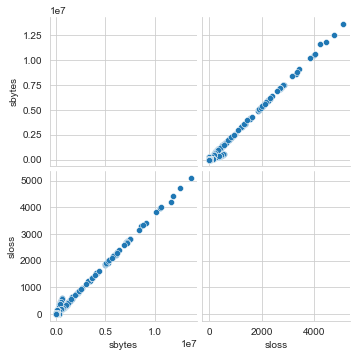

In [19]:
sns.set_style("whitegrid")
sns.pairplot(data=sample, vars=['sbytes', 'sloss'])
plt.show()

#### dpkts, dbytes and dloss ####
These features are also showing same charecteristics as above.
1. "dpkts" and "dbytes" are following a strainght line except for first few point and have 97% corr.
2. "dloss" and "dbytes" are completely following straight line with more than 99% corr.

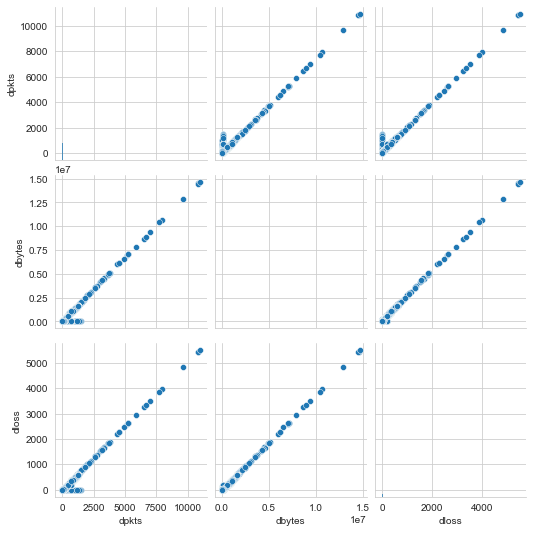

In [17]:
sns.set_style('whitegrid')
sns.pairplot(sample, vars=['dpkts', 'dbytes', 'dloss'])
plt.show()

#### sttl, ct_state_ttl, label ####
sttl and ct_state_ttl are having 90% correlation between them.
But one important thing to notice that these 2 features are also highly correlated with target features i.e, label.
Going to drop 1 feature, and the remaining feature could play a vital role for the classification task.

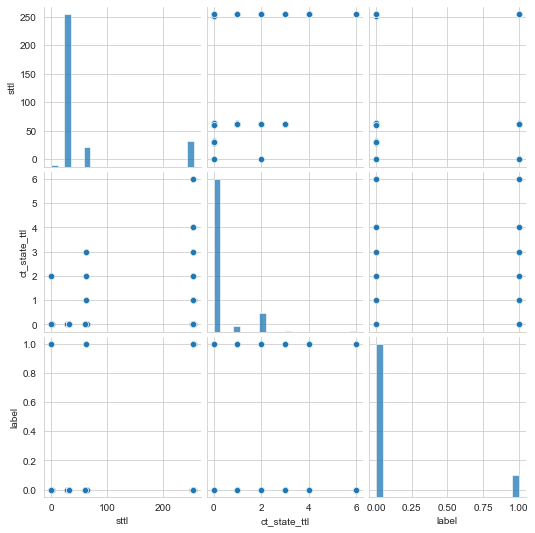

In [18]:
sns.set_style('whitegrid')
sns.pairplot(sample, vars=['sttl', 'ct_state_ttl', 'label'])
plt.show()

#### swin, dwin ####
swin: Source TCP window advertisement, dwin: Destination TCP window advertisement

Correlation values is 99% between them. Even though these 2 columns are numerical but most of their values are only 0 and 255.

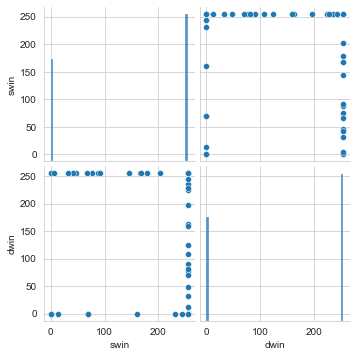

In [20]:
sns.set_style('whitegrid')
sns.pairplot(sample, vars=['swin', 'dwin'])
plt.show()

#### tcprtt, synack and ackdat ####
- synack: The time between the SYN and the SYN_ACK packets of the TCP.
- ackdat: The time between the SYN_ACK and the ACK ackets of the TCP.
- tcprtt: sum of above 2 columns.

There are some similarity between "tcprtt" and "synack" and "tcsprtt" and "actdat" as value of x increases value of y also increases.
But for "synack" and "ackdat" values are scattered all over. And its corr value also not over 90%

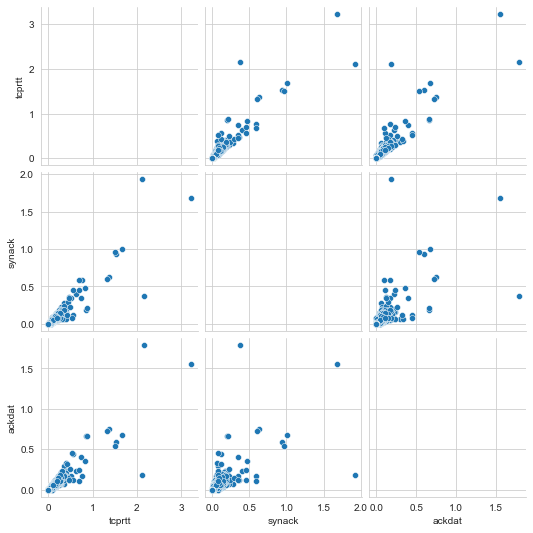

In [92]:
sns.set_style('whitegrid')
sns.pairplot(sample, vars=['tcprtt', 'synack', 'ackdat'])
plt.show()

#### ct_srv_src, ct_srv_dst and ct_dst_src_ltm ####
1. Range of all the features are between 0 to 60.
2. Most of the values are close to 0 and less than 10.
3. Values are well scattered but there are clear line that means have some linear relationship.

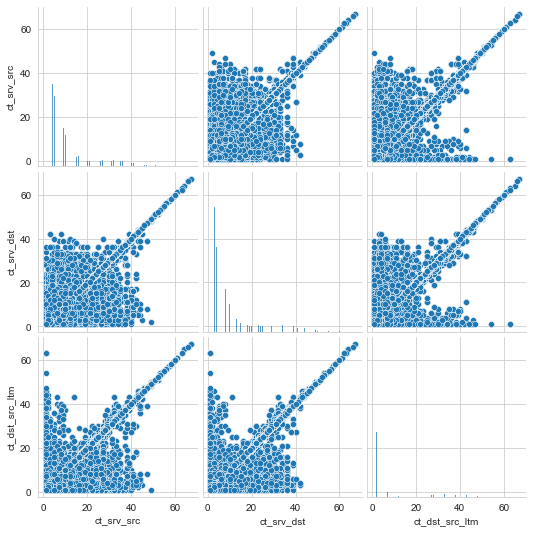

In [81]:
sns.pairplot(sample, vars=['ct_srv_src', 'ct_srv_dst', 'ct_dst_src_ltm'])
plt.show()

#### ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm and ct_dst_sport_ltm ####
- values range from 0 to 60.
- Most of the values are close to 0 and lesser than 20.
- ct_dst_ltm highly corr with ct_dst_sport_ltm
- ct_src_ltm corr with ct_src_dport_ltm
- ct_src_dport_ltm corr with ct_dst_sport_ltm

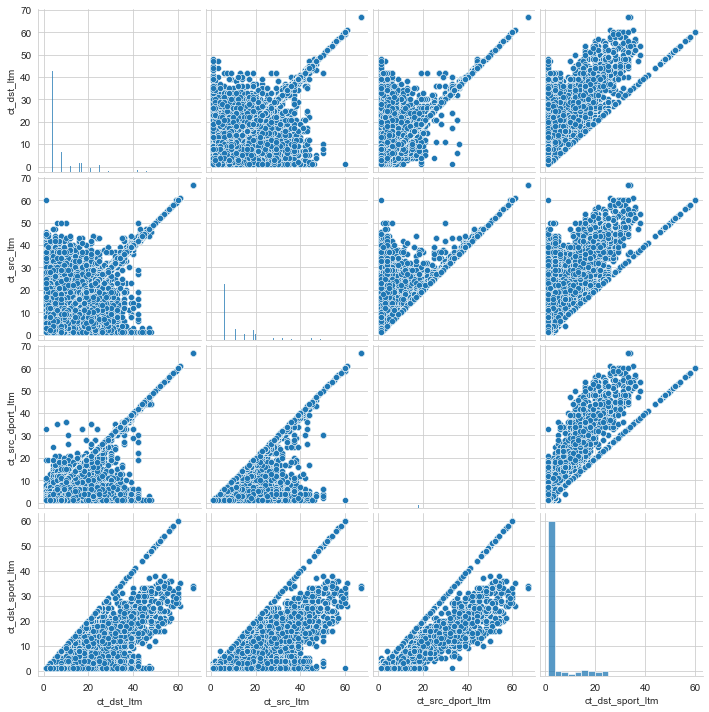

In [82]:
sns.pairplot(sample, vars=['ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm'])
plt.show()

## Countplots and pdf of features ##
#### Utility functions ####

In [12]:
# Dividing the sample data into attack and non-attack category
normal = sample[sample['label']==0]
anomaly = sample[sample['label']==1]

In [13]:
def col_countplot(col, sample_data=sample):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=sample_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

In [14]:
# Plotting pdf of numerical columns
# Refer: https://www.kaggle.com/khairulislam/unsw-nb15-eda

def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

In [15]:

def reduce_column(s, to_keep):
    """
    This function reduce categorical values of a given feature to values provided in to_keep list
    and make every other value "others"
    """
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

### Attack Category ###
- The name of each attack category. In this data set, there are total nine categories of attack and normal is non-attack.

- The data is highly imbalanced and have lots of non-attack than attacks.

- In sample data most occured attack data categories are "Generic", "Exploits", Fuzzers", "DoS" and "Reconnaissance"

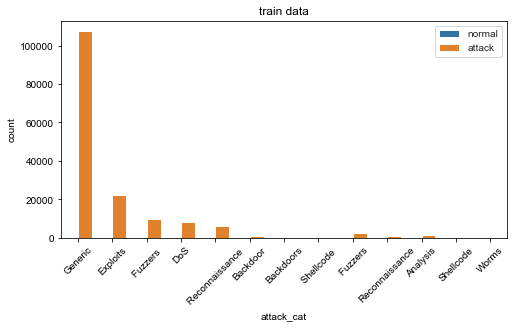

In [16]:
col_countplot('attack_cat')

#### Proto ####
Categorical feature. Transaction protocol

- The no of unique values of 'proto' in dataset where attack is normal is 7 but in anamoly category its 129. So to plot it we are reducing the no of values.
- Most of the values consists of udp and tcp
- For non-attacks count of tcp is lot higher
- Considering the imbalce there are lots of udp cat for attacks

In [17]:
sample['proto'].nunique()

135

In [18]:
normal['proto'].nunique(), anomaly['proto'].nunique()

(9, 129)

In [19]:
sample['proto'].value_counts().head(10)*100/sample.shape[0]

tcp     58.861959
udp     38.992334
unas     0.641405
arp      0.396292
ospf     0.304955
sctp     0.059448
icmp     0.021496
any      0.017323
gre      0.011968
ipv6     0.011023
Name: proto, dtype: float64

In [20]:
to_keep = ['tcp', 'udp', 'unas', 'arp', 'ospf']
sample['proto_reduced'] = sample['proto'].apply(reduce_column, args=(to_keep,))

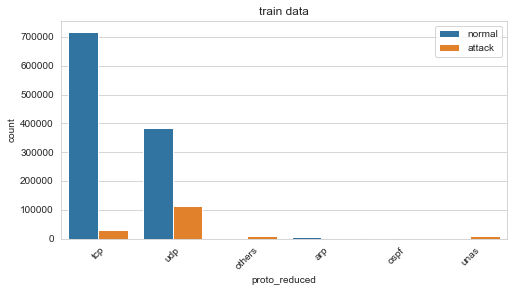

In [21]:
col_countplot('proto_reduced')

#### Service ####
Categorical Features

- In our dataset we can value "-" that is null, we need to remove that and replace it.
- For normal there are lots of others that means most of "-" and few rare values.
- In attack data "dns" is present higher than any other values. There are few no of others and http also.

In [22]:
sample['service'].nunique()

13

In [23]:
sample['service'].value_counts()

-           623161
dns         390841
http        103625
ftp-data     62619
smtp         40745
ftp          24571
ssh          23439
pop3           779
ssl             80
dhcp            77
snmp            52
radius          18
irc             17
Name: service, dtype: int64

In [24]:
to_keep = ['dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']
sample['service_reduced'] = sample['service'].apply(reduce_column, args=(to_keep,))

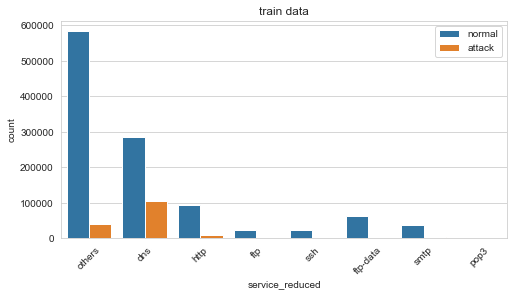

In [25]:
col_countplot('service_reduced')

#### State ####
Categorical feature - The state and its dependent protocol

- Reducing very rare values with "others" to plot and visualize better
- For non-attacks "fin" is very frequent then "cons" almost half of "fin" and few "int" also.
- In attack "int" is higher than normal cat values. That could be really important feature to detect. There are very few "fin"

In [26]:
sample['state'].nunique()

15

In [27]:
sample['state'].value_counts()

FIN    739347
CON    280521
INT    245017
REQ      4514
RST       254
ECO       187
CLO        76
URH        49
ACC        22
PAR        12
no          6
TXD         5
ECR         5
TST         5
MAS         4
Name: state, dtype: int64

In [28]:
to_keep = ['int', 'fin', 'con', 'req']
sample['state_reduced'] = sample['state'].apply(reduce_column, args=(to_keep,))

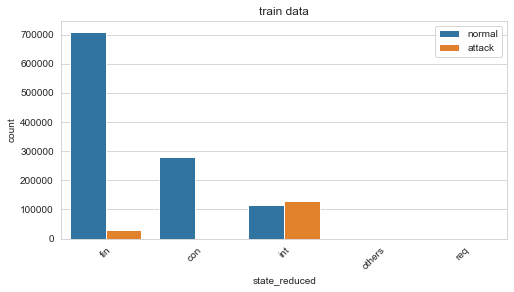

In [29]:
col_countplot('state_reduced')

In [30]:
sample.drop(columns=['proto_reduced', 'state_reduced', 'service_reduced'], inplace=True)

In [31]:
sample.shape

(1270024, 49)

#### ct_dst_ltm ####
Numerical feature.
- No. of connections of the same destination address in 100 connections according to the last time.

- Range of values of this feature is about 0 to 70
- For normal data most of the values are between 0 to 10 and few from 10 to 20.
- For anomaly values are close to 0 and also there are values from 10 to 30.
- Can visualize better after using log1p on the feature

In [32]:
col = 'ct_dst_ltm'
sample[col].nunique()

62

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

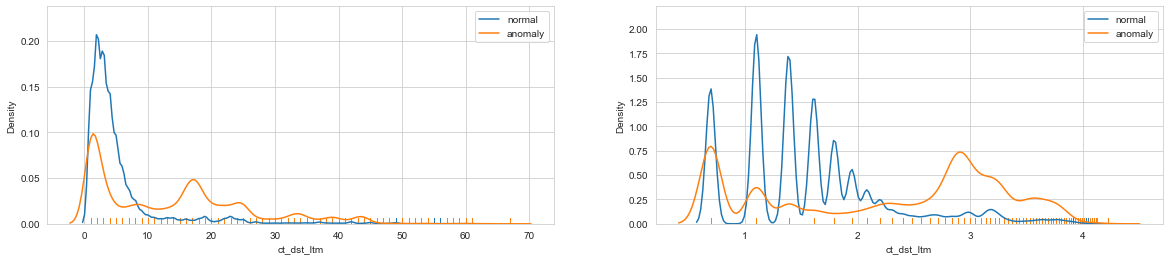

In [33]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### ct_flw_http_mthd ####
Numerical feature with small discreate set of values.
- No. of flows that has methods such as Get and Post in http service.
- For normal almost all the values are 0 and few 1.
- In attack data everything is 0 and there is very very litle no of 1's

In [34]:
sample['ct_flw_http_mthd'].nunique()

16

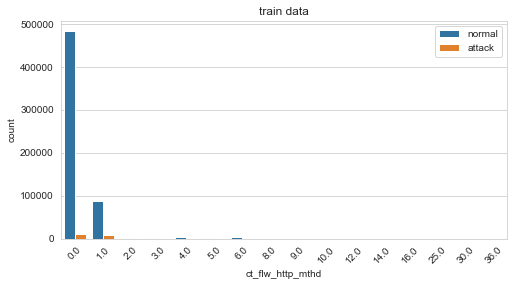

In [35]:
col_countplot('ct_flw_http_mthd')

#### ct_srv_src

In [36]:
col = 'ct_srv_src'
sample[col].nunique()

65

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

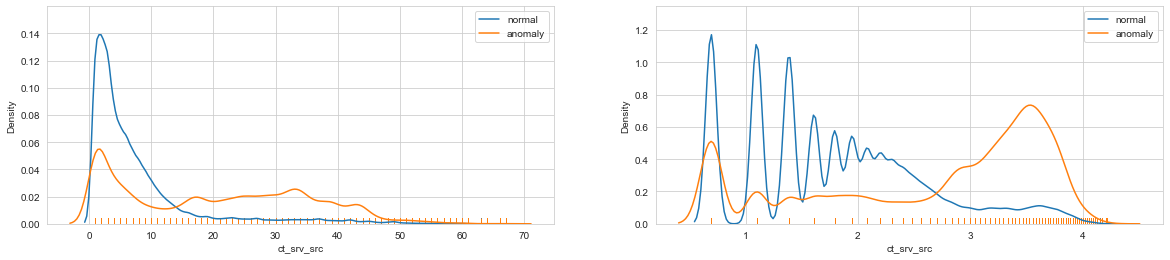

In [37]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### ct_state_ttl

In [38]:
sample['ct_state_ttl'].nunique()

7

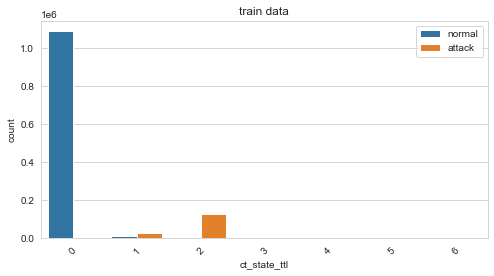

In [39]:
col_countplot('ct_state_ttl')

#### ct_dst_sport_ltm

In [40]:
sample['ct_dst_sport_ltm'].nunique()

55

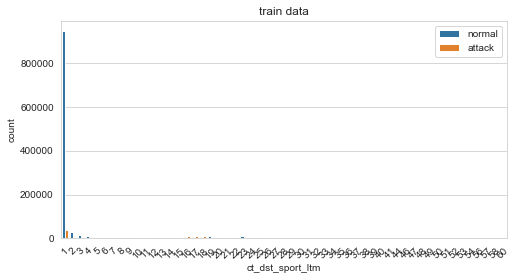

In [41]:
col_countplot('ct_dst_sport_ltm')

#### dintpkt

In [42]:
sample['dintpkt'].nunique()

545646

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

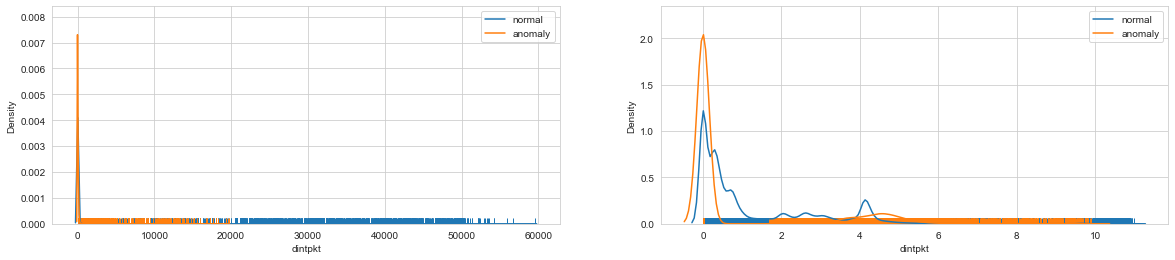

In [43]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dintpkt')
plt.subplot(122)
dual_plot('dintpkt', method=np.log1p)
plt.show()

#### djit

In [44]:
sample['djit'].nunique()

734490

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

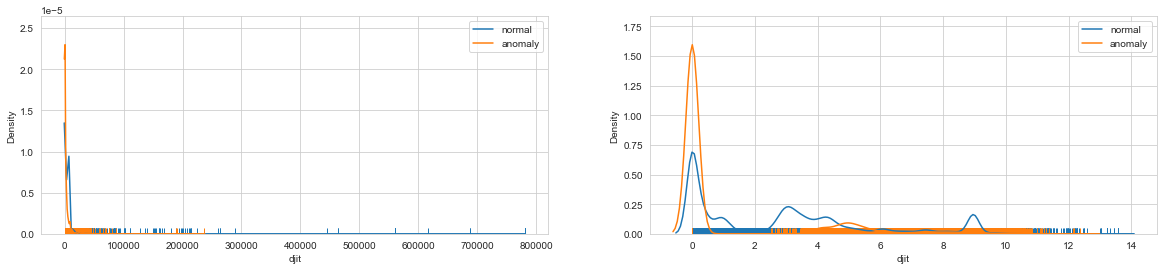

In [45]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('djit')
plt.subplot(122)
dual_plot('djit', method=np.log1p)
plt.show()

In [46]:
#dload
sample['dload'].nunique()


635195

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

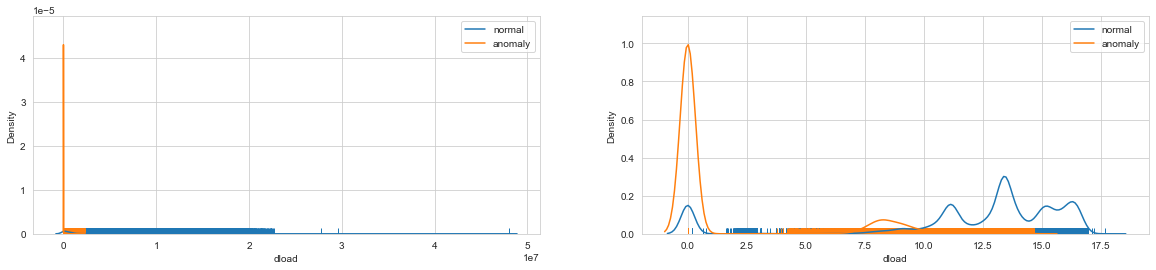

In [47]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dload')
plt.subplot(122)
dual_plot('dload', method=np.log1p)
plt.show()

In [48]:
# dbytes
col = 'dbytes'
sample[col].nunique()

12718

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

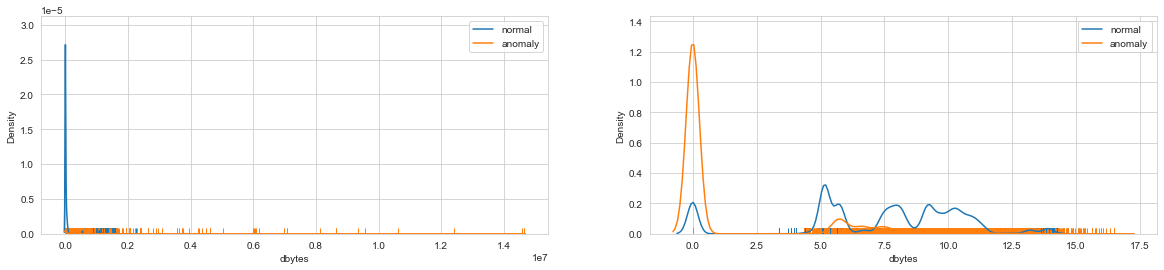

In [49]:

plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [50]:
#dmeansz
col = 'dmeansz'
sample[col].nunique()

1397

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

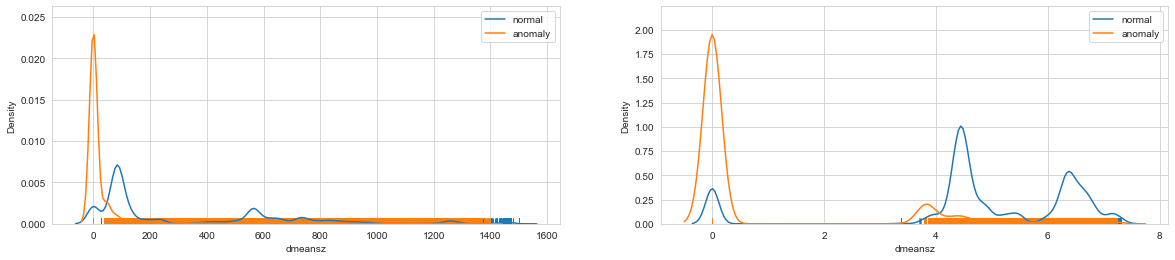

In [51]:

plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [52]:
# dpkts

sample['dpkts'].nunique()

1085

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

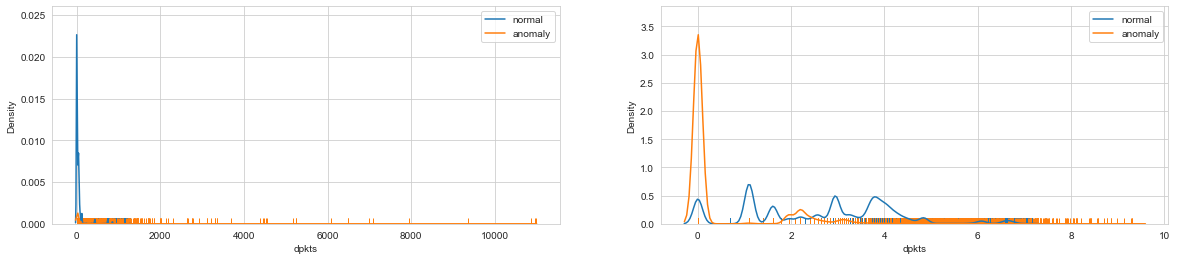

In [53]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dpkts')
plt.subplot(122)
dual_plot('dpkts', method=np.log1p)
plt.show()

In [54]:
# dtcpb
col = 'dtcpb'
sample[col].nunique()

723221

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

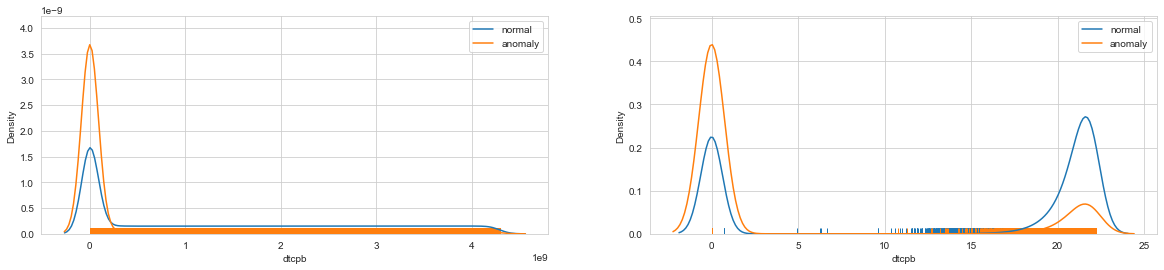

In [55]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [56]:
#dttl
sample['dttl'].nunique()

11

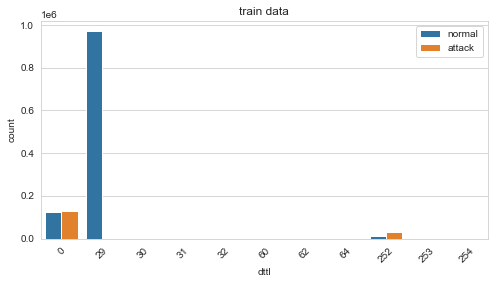

In [57]:
col_countplot('dttl')

In [58]:
#dur
col = 'dur'
sample[col].nunique()

361018

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

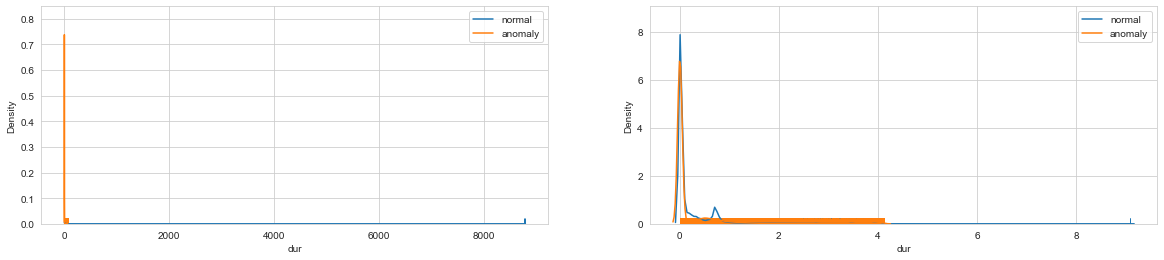

In [59]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [60]:
# sintpkt
sample['sintpkt'].nunique()

550553

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

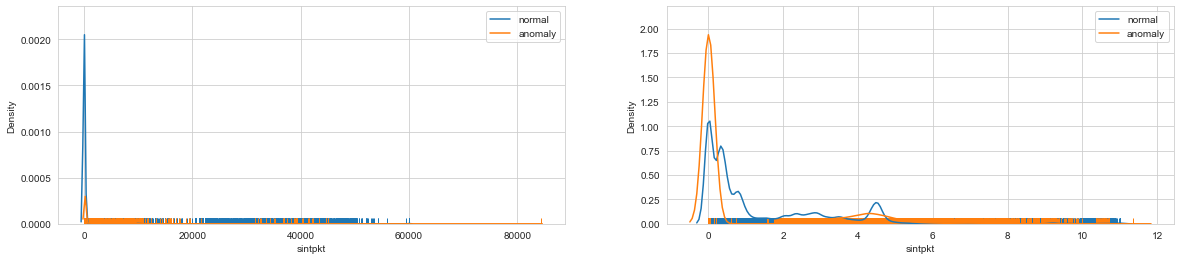

In [61]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('sintpkt')
plt.subplot(122)
dual_plot('sintpkt', method=np.log1p)
plt.show()

In [62]:
#sttl
sample['sttl'].nunique()

13

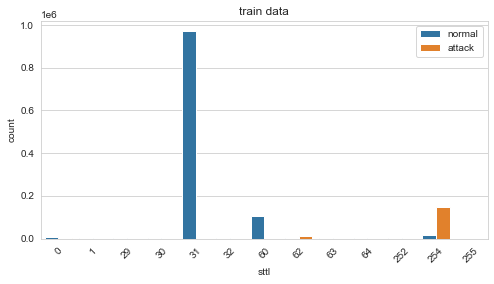

In [63]:
col_countplot("sttl")

In [64]:
#stcpb
col = 'stcpb'
sample[col].nunique()

723540

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

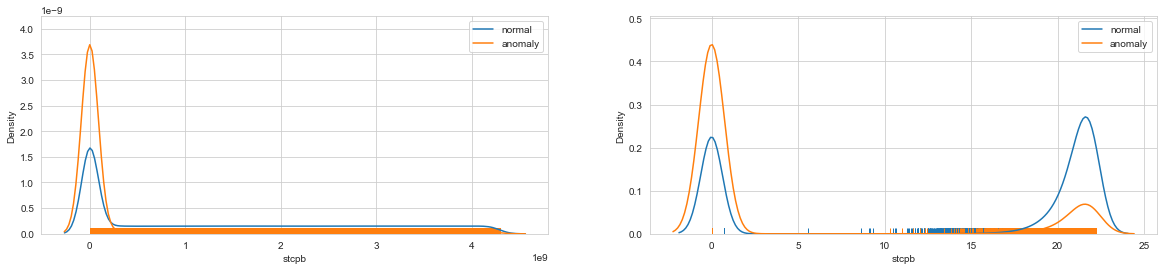

In [65]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [66]:
#swin
sample['swin'].nunique()

20

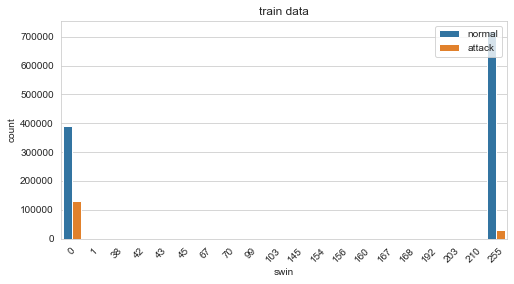

In [67]:
col_countplot('swin')

In [68]:
#sbytes
col = 'sbytes'
sample[col].nunique()

9751

C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohis\anaconda3\lib\site-pack

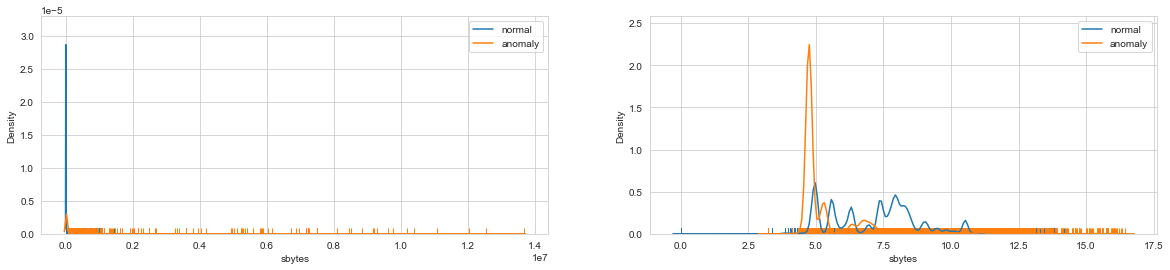

In [69]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()